# Using TensorFlow

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
warnings.resetwarnings()
warnings.simplefilter(action='ignore', category=ImportWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=ResourceWarning)

In [2]:
import numpy as np
import tensorflow as tf

## Check Hardware Availability

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17879979444925830393
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15868438119
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16224366076179612907
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 6eb3:00:00.0, compute capability: 6.0"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 15868438119
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16822653124093572538
physical_device_desc: "device: 1, name: Tesla P100-PCIE-16GB, pci bus id: 925a:00:00.0, compute capability: 6.0"
]


## CPU vs GPU

In [4]:
%%time
m = 10000
n = 10000
p = 10000

with tf.device('/cpu:0'):
    a = tf.random_normal([m, n], mean=0, stddev=1)
    b = tf.random_normal([n, p], mean=0, stddev=1)
    c = tf.matmul(a, b)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
res = sess.run(c)
print(res.shape, res.dtype)

(10000, 10000) float32
CPU times: user 52 s, sys: 459 ms, total: 52.4 s
Wall time: 4.43 s


In [5]:
%%time
m = 10000
n = 10000
p = 10000

with tf.device('/gpu:0'):
    a = tf.random_normal([m, n], mean=0, stddev=1)
    b = tf.random_normal([n, p], mean=0, stddev=1)
    c = tf.matmul(a, b)
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
res = sess.run(c)
print(res.shape, res.dtype)

(10000, 10000) float32
CPU times: user 161 ms, sys: 322 ms, total: 483 ms
Wall time: 487 ms


## Basic computations in TensorFlow

### Starting a session

In [6]:
tf.InteractiveSession()

### Creation of tensors

In [7]:
a = tf.zeros((3,5))
a.eval()

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
a.dtype, a.shape

(tf.float32, TensorShape([Dimension(3), Dimension(5)]))

In [9]:
b = tf.ones((3,5))
b.eval()

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [10]:
c = tf.fill((3,5), value=23.0)
c.eval()

array([[23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.]], dtype=float32)

In [11]:
d = tf.eye(5)
d.eval()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [12]:
e = tf.diag(tf.range(1.0,6.0))
e.eval()

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 5.]], dtype=float32)

### Generating random numbers

In [13]:
x = tf.random_normal((5,3))
x.eval()

array([[ 0.8595523 ,  0.8413752 ,  0.17260565],
       [-0.34870195, -1.7808656 ,  1.2677807 ],
       [-1.1240525 ,  0.44624546,  0.923595  ],
       [ 0.85716426, -1.8766328 ,  0.31909597],
       [-1.0076166 , -0.8801923 , -1.2073551 ]], dtype=float32)

In [14]:
y = tf.random_uniform((5,3))
y.eval()

array([[0.5320115 , 0.19532275, 0.2381028 ],
       [0.41280723, 0.17355192, 0.42522407],
       [0.8522011 , 0.3095671 , 0.93436027],
       [0.17060041, 0.10697305, 0.4593197 ],
       [0.8464248 , 0.91923404, 0.02449298]], dtype=float32)

In [15]:
z = tf.random_poisson(5, (5,3))
z.eval()

array([[5., 7., 5.],
       [5., 5., 5.],
       [1., 3., 3.],
       [5., 7., 7.],
       [5., 6., 9.]], dtype=float32)

## Opearations and graphs

#### The object stored in a variable is not its value.

In [16]:
z

<tf.Tensor 'random_poisson/RandomPoissonV2:0' shape=(5, 3) dtype=float32>

In [17]:
z.eval()

array([[ 3.,  5., 12.],
       [ 3.,  5.,  7.],
       [ 1., 10.,  5.],
       [ 4.,  3.,  4.],
       [ 5.,  8.,  4.]], dtype=float32)

In [18]:
z.eval()

array([[ 5.,  5.,  3.],
       [ 4.,  5.,  4.],
       [ 8.,  9.,  5.],
       [ 7.,  5.,  8.],
       [ 5.,  2., 11.]], dtype=float32)

#### Element-wise operations

In [19]:
op1 = (a + b) * c
op1.eval()

array([[23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.]], dtype=float32)

In [20]:
op2 = tf.multiply(tf.add(a, b), c)
op2.eval()

array([[23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.]], dtype=float32)

#### Matrix operations

In [21]:
op3 = tf.matmul(c, tf.transpose(c))
op3.eval()

array([[2645., 2645., 2645.],
       [2645., 2645., 2645.],
       [2645., 2645., 2645.]], dtype=float32)

In [22]:
c.eval()

array([[23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.],
       [23., 23., 23., 23., 23.]], dtype=float32)

In [23]:
tf.reshape(c, (5,-1)).eval()

array([[23., 23., 23.],
       [23., 23., 23.],
       [23., 23., 23.],
       [23., 23., 23.],
       [23., 23., 23.]], dtype=float32)

### Broadcasting

In [24]:
(c - 22).eval()

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [25]:
(c + tf.ones((3, 1))).eval()

array([[24., 24., 24., 24., 24.],
       [24., 24., 24., 24., 24.],
       [24., 24., 24., 24., 24.]], dtype=float32)

In [26]:
(c * tf.constant(2.0, shape=(1, 5))).eval()

array([[46., 46., 46., 46., 46.],
       [46., 46., 46., 46., 46.],
       [46., 46., 46., 46., 46.]], dtype=float32)

### Explicit Casts

In [27]:
x1 = tf.eye(3)

In [28]:
x2 = tf.eye(3, dtype=tf.int32)

In [29]:
try:
    x1 + x2
except ValueError as e:
    print(e)

Tensor conversion requested dtype float32 for Tensor with dtype int32: 'Tensor("eye_2/MatrixDiag:0", shape=(3, 3), dtype=int32)'


In [30]:
x2 = tf.cast(x2, dtype=tf.float32)

In [31]:
(x1 + x2).eval()

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]], dtype=float32)

## Reductions

In [32]:
x = tf.random_normal((10,1), 0, 1)
x.eval()

array([[-0.5538588 ],
       [-0.902448  ],
       [ 0.92864126],
       [ 0.02056014],
       [ 1.3005756 ],
       [ 1.5724373 ],
       [-0.13663308],
       [ 1.4505969 ],
       [ 0.20310943],
       [ 0.1573603 ]], dtype=float32)

#### Mean

In [33]:
tf.reduce_mean(x).eval()

-0.007978559

#### Sum of squares

In [34]:
tf.reduce_sum(tf.square(x)).eval()

11.697659

## Data Flow Graphs 

In [35]:
tf.get_default_graph()

Run if necessary
```bash
! pip install graphviz
```

Source for graph drawing code: [Visualizing TensorFlow Graphs in Jupyter Notebooks](https://blog.jakuba.net/2017/05/30/tensorflow-visualization.html)

In [36]:
from graphviz import Digraph

In [37]:
def tf_to_dot(graph):
    dot = Digraph()

    for n in g.as_graph_def().node:
        dot.node(n.name, label=n.name)

        for i in n.input:
            dot.edge(i, n.name)
            
    return dot

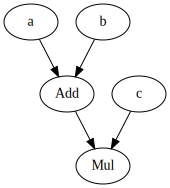

In [38]:
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    ans = tf.multiply(tf.add(a, b), c)
    
tf_to_dot(g)

## Constants, Variables and Placeholders

### Constants

Not much to explain here. Use constants to store invariant values, for example - fixed hyperparameters.

In [39]:
a = tf.constant(3.0)
a.eval()

3.0

In [40]:
b = tf.ones(3)
b.eval()

array([1., 1., 1.], dtype=float32)

### Variables

In [41]:
c = tf.Variable(tf.ones(3))

In [42]:
try:
    c.eval()
except tf.errors.FailedPreconditionError as e:
    print(e)

Attempting to use uninitialized value Variable
	 [[Node: Variable/_54 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_4_Variable", _device="/job:localhost/replica:0/task:0/device:GPU:0"](Variable)]]


In [43]:
with tf.Session() as s1:
    s1.run(tf.global_variables_initializer())
    print(s1.run(c))

[1. 1. 1.]


In [44]:
with tf.Session() as s1:
    s1.run(c.assign(5*b))
    print(s1.run(c))

[5. 5. 5.]


Variables are updated on each pass of the data flow graph. They are used to store parameters that must be updated, for example, weights and biases of a network.

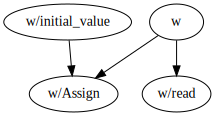

In [45]:
g = tf.Graph()

with g.as_default():
    w = tf.Variable(0, name='w')
    
tf_to_dot(g)

### Placeholders

Placeholders are used to feed in data when the data flow graph is run.

In [46]:
x = tf.placeholder(tf.float32, shape=(3,3))
y = tf.matmul(x, x)

data = np.random.rand(3, 3)

with tf.Session() as s1:
    print(s1.run(y, feed_dict={x: data})) 

[[1.5595658  1.809605   1.5584247 ]
 [0.6602277  0.9038369  0.7964621 ]
 [0.9543481  0.9136904  0.78078914]]
